In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import warnings

warnings.filterwarnings("ignore")

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])

In [2]:
# Unidades no S.I [Kg, N/m, (N*s)/m]:
# GDL não suspenso:
mu = 75
ku = 193000

# GDL suspenso:
ms = 375
ks = 35000
cs = 1800

In [3]:
# Matriz das massas (Kg):
M = np.array([
    [mu, 0,],
    [0, ms]
], dtype=float)

# Matriz de amortecimento (N*s/m):
C = np.array([
    [cs, -cs],
    [-cs, cs]
], dtype=float)

# Matriz de rigidez (N/m):
K = np.array([
    [(ks+ku), -ks],
    [-ks, ks]
], dtype=float)

### Encontrando as Frequências Naturais:

In [4]:
# Cálculo de M^(-1/2):
MM = np.power(M, -1/2)  # Inverso da raíz quadrada
MM[MM == np.inf] = 0  # Transforma os elementos infinitos em zero

ktil = MM@K@MM  # Cálculo da matriz ktil 
lamb, p = np.linalg.eig(ktil) # Obtenção dos autovalores

omega_n = np.sqrt(lamb)

labels = ['u', 's']
for i in range(len(omega_n)):
    print(f'w{labels[i]} = {round((omega_n[i]), 4)} rad/s')

wu = 55.2694 rad/s
ws = 8.8671 rad/s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


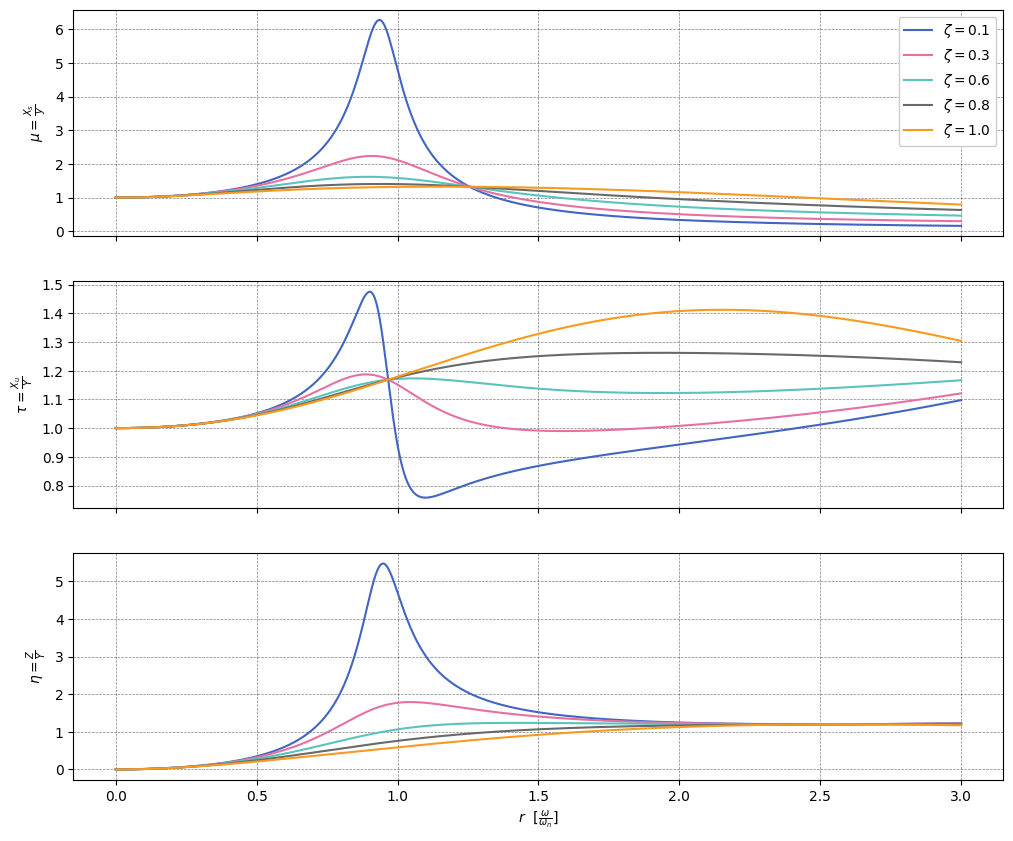

In [5]:
zetas = np.linspace(.1, 1, 5)

epsilon = ms/mu
#ws      = np.sqrt(ks/ms)
#wu      = np.sqrt(ku/mu)
wu = omega_n[0]
ws = omega_n[1]
alpha   = ws/wu
w     = np.arange(0, (3*wu), 1e-2)
r       = w/wu

plt.rcParams['figure.figsize'] = (12, 10)
fig, axs = plt.subplots(3, 1, sharex=True)

# axs[0] = mu: Xs/Y transmissibility suspended mass
# axs[1] = tau: Xu/Y transmissibility unsuspended mass
# axs[2] = eta: Z/Y displacement transmissibility

for zeta in zetas:
    Z1 = (r**2*(r**2*alpha**2-1)+(1-(1+epsilon)*r**2*alpha**2))
    Z2 = 2*zeta*r*(1-(1+epsilon)*r**2*alpha**2)

    mu  = np.sqrt( (4*zeta**2*r**2 + 1)/(Z1**2+Z2**2) )
    tau = np.sqrt( (4*zeta**2*r**2+1+r**2*(r**2-2))/(Z1**2+Z2**2) )
    eta = np.sqrt(r**4 / (Z1**2+Z2**2))

    axs[0].plot(r, mu, label=f'$\\zeta={zeta:.1f}$')
    axs[1].plot(r, tau, label=f'$\\zeta={zeta:.1f}$')
    axs[2].plot(r, eta, label=f'$\\zeta={zeta:.1f}$')

# put the Y label in diagonal to save space

axs[0].set_ylabel('$\mu = \\frac{X_s}{y}$')
axs[1].set_ylabel('$\\tau = \\frac{X_u}{Y}$')
axs[2].set_ylabel('$\eta = \\frac{Z}{Y}$')
axs[2].set_xlabel('$r ~~[\\frac{\omega}{\omega_n}]$')

plt.subplot(3, 1, 1)
plt.legend(loc='upper right')
plt.savefig('curves/transXzeta.eps', dpi=600, transparent=True, bbox_inches='tight')